--- Logistic Regression ---
Accuracy: 0.680
Precision: 0.680
Recall: 1.000
F1 Score: 0.810
ROC AUC: 0.484

--- Random Forest ---
Accuracy: 0.670
Precision: 0.680
Recall: 0.971
F1 Score: 0.800
ROC AUC: 0.551



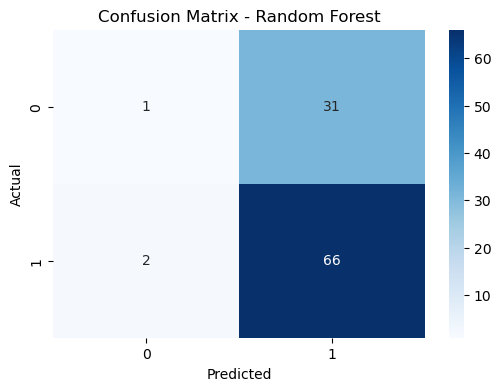

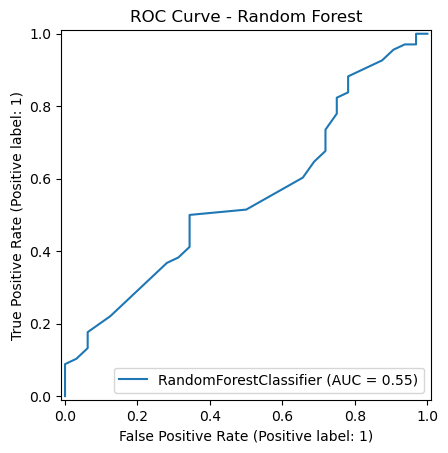

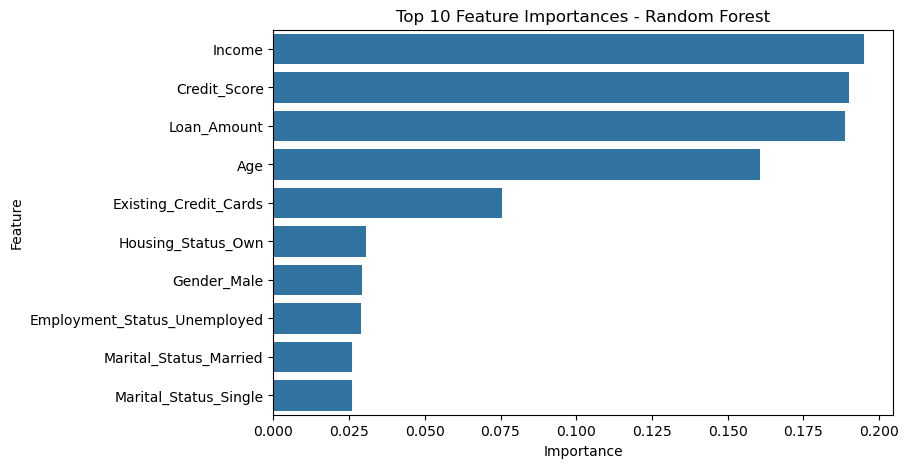

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

#  1. Load your dataset ---
# Replace 'your_dataset.csv' with your actual CSV file path
df = pd.read_csv('credit_card_approval_dataset.csv')

# --- 2. Define target and features ---
# Replace 'Approved' with your target column name
target_col = 'Approved'

X = df.drop(target_col, axis=1)
y = df[target_col]

# 3. Identify categorical and numerical columns ---
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 4. Preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

#  5. Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  6. Fit & transform ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 7. Initialize models ---
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# 8. Train, predict and evaluate ---
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_prob = model.predict_proba(X_test_processed)[:, 1]

    print(f'--- {name} ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred):.3f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_prob):.3f}\n')

#  9. Choose best model for evaluation (example: Random Forest) ---
best_model = models['Random Forest']

# Confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test_processed))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(best_model, X_test_processed, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

# Feature importance
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features)
importances = best_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()
